In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())


The steps in the randomized response survey can be visualized using a *tree diagram*. The diagram partitions all the survey respondents according to their true and answer and the answer that they eventually give. It also displays the proportions of respondents whose true answers are 1 ("yes") and 0 ("no"), as well as the chances that determine the answers that they give. As in the code above, we have used *p* to denote the proportion whose true answer is 1.

![Tree Diagram](../assets/images/rand_response_tree.png)

The respondents who answer 1 split into two groups. The first group consists of the respondents whose true answer and given answers are both 1. If the number of respondents is large, the proportion in this group is likely to be about 2/3 of *p*. The second group consists of the respondents whose true answer is 0 and given answer is 1. This proportion in this group is likely to be about 1/3 of *1-p*.

We can observed $p^*$, the proportion of 1's among the given answers. Thus
$$
p^* ~\approx ~ \frac{2}{3} \times p ~+~ \frac{1}{3} \times (1-p)
$$

This allows us to solve for an approximate value of *p*:
$$
p ~ \approx ~ 3p^* - 1
$$

In this way we can use the observed proportion of 1's to "work backwards" and get an estimate of *p*, the proportion in which whe are interested. 

**Technical note.** It is worth noting the conditions under which this estimate is valid. The calculation of the proportions in the two groups whose given answer is 1 relies on *each of the groups* being large enough so that the Law of Averages allows us to make estimates about how their dice are going to land. This means that it is not only the total number of respondents that has to be large – the number of respondents whose true answer is 1 has to be large, as does the number whose true answer is 0. For this to happen, *p* must be neither close to 0 nor close to 1. If the characteristic of interest is either extremely rare or extremely common in the population, the method of randomized response described in this example might not work well.

In the example above, the survey scheme involved sampling uniformly at random with replacement from a set of integers (1 through 6), and using the observed data to estimate an unknown quantity. Here is an example in which the same ideas are used in quite a different setting and in a way that allows us to further develop our methods of estimation.

Estimating the number of enemy aircraft
-------------------------------------

In World War II, data analysts working for the Allies were tasked with estimating the number of German warplanes. The data included the serial numbers of the German planes that had been observed by Allied forces. These serial numbers gave the data analysts a way to come up with an answer.

To create an estimate of the total number of warplanes, the data analysts had to make some assumptions about the serial numbers. Here are two such assumptions, greatly simplified to make our calculations easier.

1. There are N planes, numbered $1, 2, ... , N$. 

2. The observed planes are drawn uniformly at random with replacement from the $N$ planes.

The goal is to estimate the number $N$.

Suppose you observe some planes and note down their serial numbers. How might you use the data to guess the value of $N$? A natural and straightforward method would be to simply use the **largest serial number observed**.

Let us see how well this method of estimation works. First, another simplification: Some historians now estimate that the German aircraft industry produced almost 100,000 warplanes of many different kinds, But here we will imagine just one kind. That makes Assumption 1 above easier to justify.

Suppose there are in fact $N = 300$ planes of this kind, and that you observe 30 of them. We can construct a table called ``serialno`` that contains the serial numbers 1 through $N$. We can then sample 30 times with replacement (see Assumption 2) to get our sample of serial numbers. Our estimate is the maximum of these 30 numbers.

In [2]:
N = 300
serialno = Table([np.arange(1, N+1)], ['serial number'])

In [3]:
serialno.sample(30, with_replacement=True).max()

serial number
290


As with all code involving random sampling, run it a few times to see the variation. You will observe that even with just 30 observations from among 300, the largest serial number is typically in the 250-300 range. 

In principle, the largest serial number could be as small as 1, if you were unlucky enough to see Plane Number 1 all 30 times. And it could be as large as 300 if you observe Plane Number 300 at least once. But usually, it seems to be in the very high 200's. It appears that if you use the largest observed serial number as your estimate of the total, you will not be very far wrong.

Let us generate some data to see if we can confirm this. We will use *iteration* to repeat the sampling procedure numerous times, each time noting the largest serial number observed. These would be our estimates of $N$ from all the numerous samples. We will then draw a histogram of all these estimates, and examine by how much they differ from $N = 300$.

In the code below, we will run 750 repetitions of the following process: Sample 30 times at random with replacement from 1 through 300 and note the largest number observed.

To do this, we will use a ``for`` loop. As you have seen before, we will start by setting up an empty table that will eventually hold all the estimates that are generated. As each estimate is the largest number in its sample, we will call this table ``maxes``.

For each integer (called ``i`` in the code) in the range 1 through 750, the ``for`` loop executes the code in the body of the loop. In this example, it generates a random sample of 30 serial numbers, computes the maximum value, and augments the rows of ``maxes`` with that value.

In [4]:
sample_size = 30
repetitions = 751

maxes = Table([[]], ['maxes'])

for i in range(repetitions):
    m = serialno.sample(sample_size, with_replacement=True).max()
    maxes.append([m.rows[0][0]])

Here is a histogram of the 750 estimates. As you can see, they are all crowded up near 300, even though in theory they could be much smaller. As an estimate for the total number of planes, the largest serial number might be too low by about 10 to 25, and is unlikely to be off by more than about 50.

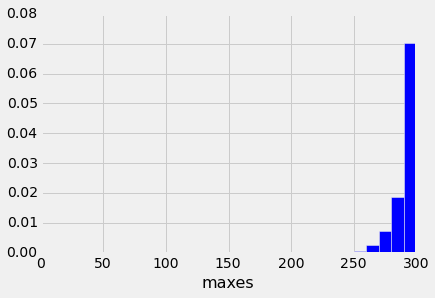

In [5]:
maxes.hist(bins=np.arange(0, N+1, 10), normed=True)